In [18]:
##### Neural Networks - Ex 3, Ex 4 Coursera
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plot
import math
from sklearn import svm
import scipy.io




In [236]:
##Preparing Data (1)
data = scipy.io.loadmat('ex4data1.mat')
X = data['X']
y = data['y']
m = len(X)

###Loading Thetas
Thetas=scipy.io.loadmat("ex4weights.mat")
##Asigning for better work
Theta1=Thetas["Theta1"]
Theta2=Thetas["Theta2"]

##Initialization of parameters of NN Arch

input_layer_size  = 400 # 20x20 Input Images of Digits
hidden_layer_size = 25  # 25 hidden units
num_labels = 10         # 10 labels, from 1 to 10   
nn_params = [*Theta1.ravel(),*Theta2.ravel()]

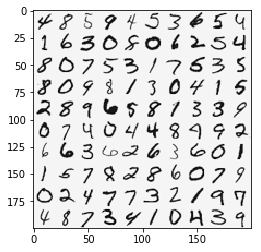

In [20]:
##display_data function taken from
#https://github.com/zsiciarz/ml-coursera/blob/master/python/ex4/ex4.py
##comments added by me

from __future__ import print_function

from numpy.linalg import norm
from matplotlib import pyplot as plot
import matplotlib.cm as cm
from scipy import optimize
from scipy.io import loadmat

def display_data(X):
    """
    Transforms each input row into a rectangular image part and plots
    the resulting image.
    """
    
    ##Setting up de dimensions of the image##
    m, n = X.shape  ##5000(m)x20(n)
    example_width = int(np.around(np.sqrt(n))) #20
    example_height = int(n / example_width) #x20
    display_rows = int(np.sqrt(m)) #10
    display_cols = int(m / display_rows) #x10
    display_array = np.zeros((
        display_rows * example_height, display_cols * example_width
    ))
    
    ##Fill the image
    for i in range(display_rows):
        for j in range(display_cols):
            idx = i * display_cols + j
            image_part = X[idx, :].reshape((example_height, example_width))
            display_array[
                (j * example_height):((j + 1) * example_height),
                (i * example_width):((i + 1) * example_width)
            ] = image_part
    ##Plot the resulting image
    plot.imshow(display_array.T, cm.Greys)
    plot.show()

sel = np.random.permutation(X)[:100]
display_data(sel)

In [21]:
## Defining functions:
def sigmoid(x, derivative=False):
    sigm = 1. / (1. + np.exp(-x))
    if derivative:
        return sigm * (1. - sigm)
    return sigm

def sigmoid_gradient(z):
    sigm_gr=sigmoid(z)*(1-sigmoid(z))
    return sigm_gr


def randInitializeWeights(L_in,L_out):
    epsilon_init = 0.12
    W = np.repeat(np.random.uniform(-epsilon_init, epsilon_init, L_out),L_in+1)
    return W


def debugInitializeWeights(fan_out, fan_in):
     return np.sin(1 + np.arange((1 + fan_in) * fan_out)).reshape((1 + fan_in, fan_out)).T / 10.
    



In [318]:
def nnCostFunction(input_layer_size, 
                           hidden_layer_size, 
                           num_labels, 
                           X, y, l):
    def Jay(nn_params):
        ##Recovering thetas##
        Theta1_unrolled_ch = np.array(nn_params[0:((input_layer_size+1)*hidden_layer_size)])
        Theta1_cf = Theta1_unrolled_ch.reshape(hidden_layer_size, (input_layer_size+1))
        
        Theta2_unrolled_ch = np.array(nn_params[(len(Theta1_unrolled_ch)):len(nn_params)])
        Theta2_cf = Theta2_unrolled_ch.reshape(num_labels,(hidden_layer_size+1) )

        #setting useful vars#
        m = len(X)
        
        #Return vars#
        J = 0
        
        ########## Forward propagation ###########
        a1 = pd.DataFrame(X)      
        a1.insert(0,"x0",1)
        z2 = np.dot(a1,pd.DataFrame(Theta1_cf).T)
        a2 = pd.DataFrame(sigmoid(z2))
        a2.insert(0,"x0",1)
        z3 = np.dot(a2, pd.DataFrame(Theta2_cf).T)
        a3 = pd.DataFrame(sigmoid(z3))
        h = a3
        ## y transformation into Y so that each row is an example
        
        Y =np.zeros([m,num_labels])
        for i in range(0,m):
            Y[i, (y[i][0]-1)] = 1
        
        ##Regularization
        sqTheta1=np.square(Theta1_cf)
        sqTheta2=np.square(Theta2_cf)
        regularization=(sqTheta2.sum(axis=0).sum(axis=0)+sqTheta1.sum(axis=0).sum(axis=0))*(l/(2*m))
        
        
        ##  Calculating Cost
        eps = 1e-5

        J=(-Y*np.log(h))-(1-Y)*np.log(1-h+eps)
        J=J.sum(axis=0).sum(axis=0)/m+regularization
        
        return(J)
    return Jay





In [319]:
l=1
s=nnCostFunction(input_layer_size, hidden_layer_size,num_labels,X, y, l)(nn_params)
s
##Well calculated cost

0.38439626173463853